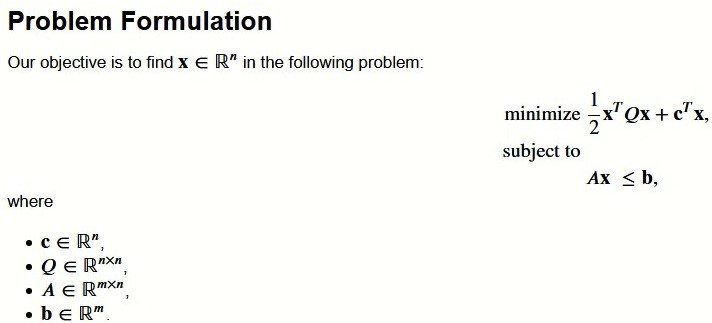

In [1]:
from IPython.display import Image
display(Image(filename='3_Quadratic_Formu.jpg'))

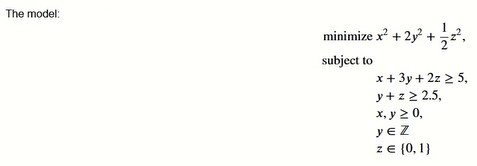

In [2]:
display(Image(filename='3_Quadratic.jpg'))

In [3]:
from gurobipy import *

In [4]:
quadratic_model = Model('Quadratic')

Set parameter Username


Define Decision Variables

In [5]:
x = quadratic_model.addVar(vtype=GRB.CONTINUOUS, lb=0, name='x')
y = quadratic_model.addVar(vtype=GRB.INTEGER, lb=0, name='y')
z = quadratic_model.addVar(vtype=GRB.BINARY, name='z')

Define Objective Function


In [6]:
obj_fn = x**2 + 2*y**2 + 0.5*z**2

In [7]:
quadratic_model.setObjective(obj_fn, GRB.MINIMIZE)

Add Constraints

In [8]:
#  x + 3y + 2x >= 5
quadratic_model.addConstr(x + 3*y + 2*z >= 5)

#  y + z >= 2.5
quadratic_model.addConstr(y + z >= 2.5)

<gurobi.Constr *Awaiting Model Update*>

Solving model and getting results

In [9]:
quadratic_model.setParam('OutputFlag', False)
quadratic_model.optimize()

print('Optimization is done. Objective Function Value: %.2f' % quadratic_model.objVal)

for v in quadratic_model.getVars():
    print('%s: %g'% (v.VarName, v.x))

Optimization is done. Objective Function Value: 8.50
x: 0
y: 2
z: 1


Update type of the decision variable

In [10]:
y.VType = GRB.CONTINUOUS

quadratic_model.optimize()

print('Optimization is done. Objective Function Value: %.2f' % quadratic_model.objVal)

for v in quadratic_model.getVars():
    print('%s: %g' % (v.VarName, v.x))

Optimization is done. Objective Function Value: 5.00
x: 0
y: 1.5
z: 1


Adding a QUADRATIC constraint

In [11]:
quadratic_model.addConstr(z**2 + y**2 <= x**2)

quadratic_model.optimize()

print('Optimization is done. Objective Function Value: %.2f' % quadratic_model.objVal)

for v in quadratic_model.getVars():
    print('%s: %g' % (v.VarName, v.x))

Optimization is done. Objective Function Value: 8.25
x: 1.80278
y: 1.5
z: 1
